<a href="https://colab.research.google.com/github/JinkyoHan/JinkyoHan/blob/main/Grapher_001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

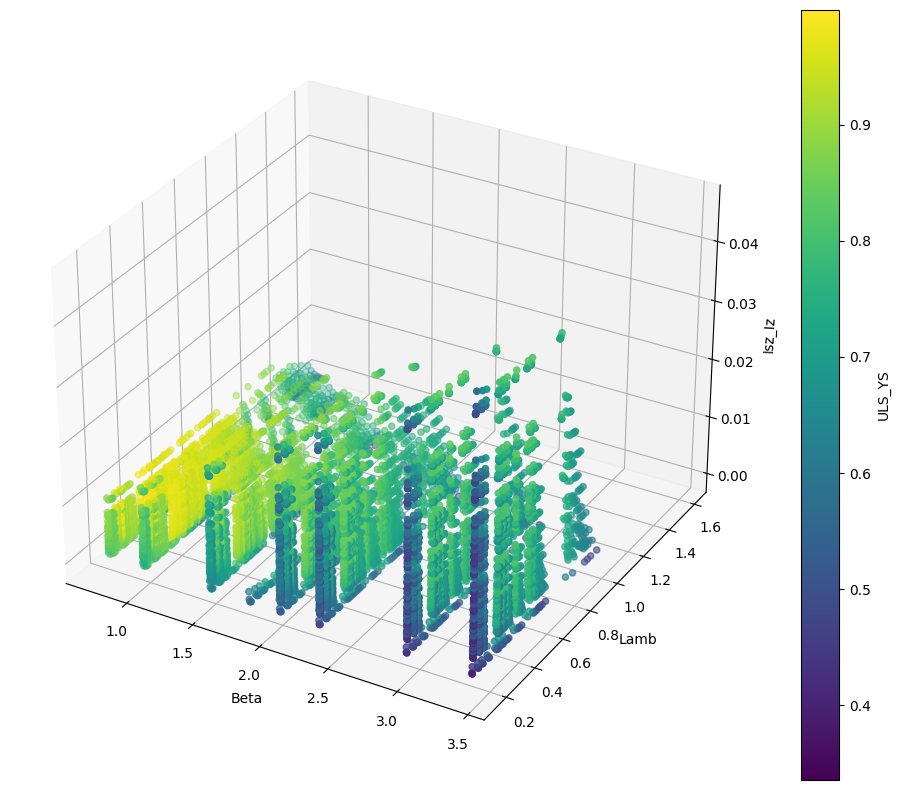

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import RandomForestRegressor

# 엑셀 파일 읽기
df = pd.read_excel('Tbar_Flatbar.xlsx')

# 입력 특성과 응답 변수 분리
X = df.iloc[:, :-1].to_numpy()  # 모든 열을 제외한 마지막 열
y = df.iloc[:, -1].to_numpy()  # 마지막 열

# Random Forest Regression 훈련
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X, y)

# 특성 중요도
feature_importances = rf.feature_importances_

# 주요 3개의 특성의 인덱스를 선택
top3_indices = feature_importances.argsort()[-3:][::-1]

# 주요 3개 특성의 데이터
x = df.iloc[:, top3_indices[0]]
y = df.iloc[:, top3_indices[1]]
z = df.iloc[:, top3_indices[2]]

# 3D 플롯 생성
fig = plt.figure(figsize=(12, 10))  # 여기에서 figsize를 사용하여 플롯 크기를 조절
ax = fig.add_subplot(111, projection='3d')

# 데이터 플롯
colors = df.iloc[:, -1]
sc = ax.scatter(x, y, z, c=colors, cmap='viridis')

# 컬러바 추가
plt.colorbar(sc, ax=ax, label=df.columns[-1])

# 축 레이블 설정
x_label = df.columns[top3_indices[0]]
y_label = df.columns[top3_indices[1]]
z_label = df.columns[top3_indices[2]]
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.set_zlabel(z_label)

# 플롯 표시
plt.show()


In [12]:
!sudo apt update -y
!sudo apt upgrade -y
!sudo apt install wget -y
!wget https://julialang-s3.julialang.org/bin/linux/x64/1.9/julia-1.9.3-linux-x86_64.tar.gz
!tar -xvzf julia-1.9.3-linux-x86_64.tar.gz
!sudo cp -r julia-1.9.3 /opt/
!sudo ln -s /opt/julia-1.9.3/bin/julia /usr/local/bin/julia

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:6 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,014 kB]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [498 kB]
Get:9 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [998 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Hit:11 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,283 kB]
Hit:13 https://pp

In [13]:
!pip install julia
!pip install pysr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.7/68.7 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 2.1 MB/s eta 0:00:00


In [14]:
import os
os.environ["PATH"] += ":/usr/local/bin/julia"

import pysr

# We don't precompile in colab because compiled modules
# are incompatible static Python libraries:
pysr.install()


Precompiling PyCall...
Precompiling PyCall... DONE
PyCall is installed and built successfully.
/usr/local/lib/python3.10/dist-packages/pysr/julia_helpers.py:208: UserWarning: Your system's Python library is static (e.g., conda), so precompilation will be turned off. For a dynamic library, try using `pyenv` and installing with `--enable-shared`: https://github.com/pyenv/pyenv/blob/master/plugins/python-build/README.md#building-with---enable-shared.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pysr/julia_helpers.py:118: UserWarning: It is recommended to restart Python after installing PySR's dependencies, so that the Julia environment is properly initialized.
  warnings.warn(


In [20]:
# Read Data
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from itertools import combinations
#-----------------------------------------------------------

data = df.dropna()

# Assuming the last column in your dataset is the target variable
X = data.iloc[:, :-1]
y = data.iloc[:, -1] # y value nondim'ed herein.

print(X)
print(y)

           Beta      Lamb       bf_tf     As_Ap      Ap_A      As_A  \
0      0.729711  1.574653    7.142857  0.092054  0.915706  0.084294   
1      0.729711  1.046020    7.142857  0.114796  0.897025  0.102975   
2      0.729711  0.977676    7.142857  0.119128  0.893553  0.106447   
3      0.729711  0.777292    7.142857  0.135373  0.880768  0.119232   
4      0.729711  0.628072    7.142857  0.152971  0.867324  0.132676   
...         ...       ...         ...       ...       ...       ...   
11021  0.729711  0.378599  115.000000  0.186846  0.842569  0.157431   
11022  0.729711  0.367565  125.000000  0.203093  0.831191  0.168809   
11023  0.729711  0.357924  135.000000  0.219341  0.820115  0.179885   
11024  0.729711  0.316278  200.000000  0.324949  0.754746  0.245254   
11025  0.729711  0.289780  280.000000  0.454929  0.687319  0.312681   

         Isy_Ipy    Isy_Iy    Isz_Iz  
0       1.097536  0.524183  0.000558  
1       3.135572  0.758880  0.000561  
2       3.695275  0.787646  0.

In [21]:
# Initialize and fit the Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X, y)

# get feature importances
feature_importances = regressor.feature_importances_

# print it out
for feature, importance in zip(X.columns, feature_importances):
    print(f'Feature: {feature}, Importance: {importance}')

# pick out the best 'N' parameters, with score.
N = 3
top_features = sorted(zip(X.columns, feature_importances), key=lambda x: x[1], reverse=True)[:N]
print(f'Top {N} important features:')
for feature, importance in top_features:
    print(f'Feature: {feature}, Importance: {importance}')

Feature: Beta, Importance: 0.5000049706242348
Feature: Lamb, Importance: 0.26482750151516643
Feature: bf_tf, Importance: 0.003749108178845716
Feature: As_Ap, Importance: 0.02283115018165215
Feature: Ap_A, Importance: 0.04739825385396151
Feature: As_A, Importance: 0.023391227522271723
Feature: Isy_Ipy, Importance: 0.057281888300319016
Feature: Isy_Iy, Importance: 0.005728040310353477
Feature: Isz_Iz, Importance: 0.0747878595131952
Top 3 important features:
Feature: Beta, Importance: 0.5000049706242348
Feature: Lamb, Importance: 0.26482750151516643
Feature: Isz_Iz, Importance: 0.0747878595131952


In [22]:
# Best Parameter Set for YOU

selected_features = [feature for feature, _ in top_features]
X_selected = X[selected_features]

# NaN 값을 포함하는 행의 인덱스를 찾습니다.
drop_indices = X_selected.dropna().index

# 해당 인덱스만 선택하여 X_selected와 y를 업데이트합니다.
X_selected = X_selected.loc[drop_indices]
y = y.loc[drop_indices]

print(X_selected)
print(y)

           Beta      Lamb    Isz_Iz
0      0.729711  1.574653  0.000558
1      0.729711  1.046020  0.000561
2      0.729711  0.977676  0.000562
3      0.729711  0.777292  0.000564
4      0.729711  0.628072  0.000567
...         ...       ...       ...
11021  0.729711  0.378599  0.000036
11022  0.729711  0.367565  0.000046
11023  0.729711  0.357924  0.000058
11024  0.729711  0.316278  0.000189
11025  0.729711  0.289780  0.000517

[11026 rows x 3 columns]
0        0.553074
1        0.705244
2        0.719511
3        0.751525
4        0.816629
           ...   
11021    0.830193
11022    0.840627
11023    0.844059
11024    0.854912
11025    0.897711
Name: ULS_YS, Length: 11026, dtype: float64


In [ ]:
from pysr import PySRRegressor

model_G = PySRRegressor(
    procs=4,
    populations=8,
    # ^ 2 populations per core, so one is always running.
    population_size=50,
    # ^ Slightly larger populations, for greater diversity.
    ncyclesperiteration=500,
    # ^ Generations between migrations.
    niterations=50,  # Run forever: 10000000
    early_stop_condition=(
        "stop_if(loss, complexity) = loss < 3e-5 && complexity < 280"
        # Stop early if we find a good and simple equation
    ),
    # timeout_in_seconds=60*60*1,
    # ^ Alternatively, stop after 'timeout_in_seconds'sec have passed.
    maxsize=300,
    # ^ Allow greater complexity.
    maxdepth=12,
    # ^ But, avoid deep nesting.
    binary_operators=["*", "+", "-", "/"],
    unary_operators=["square", "cube", "exp","sqrt"],
    constraints={
        "/": (-1, 9),
        "square": 9,
        "cube": 9,
        "exp": 9,
        "sqrt": 9,
    },
    # ^ Limit the complexity within each argument.
    # "inv": (-1, 9) states that the numerator has no constraint,
    # but the denominator has a max complexity of 9.
    # "exp": 9 simply states that `exp` can only have
    # an expression of complexity 9 as input.
    nested_constraints={
        "square": {"square": 1, "cube": 1, "exp": 0, "sqrt": 0},
        "cube": {"square": 1, "cube": 1, "exp": 0, "sqrt": 0},
        "exp": {"square": 1, "cube": 1, "exp": 0, "sqrt": 0},
        "sqrt": {"square": 0, "cube": 1, "exp": 0, "sqrt": 0},
    },
    # ^ Nesting constraints on operators. For example,
    # "square(exp(x))" is not allowed, since "square": {"exp": 0}.
    complexity_of_operators={"/": 2, "exp": 3},
    # ^ Custom complexity of particular operators.
    complexity_of_constants=2,
    # ^ Punish constants more than variables
    select_k_features=N,
    # ^ Train on only the 'k' most important features
    progress=True,
    # ^ Can set to false if printing to a file.
    weight_randomize=0.1,
    # ^ Randomize the tree much more frequently
    cluster_manager=None,
    # ^ Can be set to, e.g., "slurm", to run a slurm
    # cluster. Just launch one script from the head node.
    precision=64,
    # ^ Higher precision calculations.
    warm_start=True,
    # ^ Start from where left off.
    turbo=True,
    # ^ Faster evaluation (experimental)
    julia_project=None,
    # ^ Can set to the path of a folder containing the
    # "SymbolicRegression.jl" repo, for custom modifications.
    update=False,
    # ^ Don't update Julia packages
    model_selection='accuracy',
    parsimony=0.001, # Recommended Value: Target Loss / 10
)

model_G.fit(X_selected, y)

model_G.equations_[["complexity", "loss", "equation"]]

print(model_G.sympy())

/usr/local/lib/python3.10/dist-packages/pysr/sr.py:1281: UserWarning: Note: Using a large maxsize for the equation search will be exponentially slower and use significant memory.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pysr/sr.py:1346: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pysr/sr.py:1919: UserWarning: Note: you are running with more than 10,000 datapoints. You should consider turning on batching (https://astroautomata.com/PySR/options/#batching). You should also reconsider if you need that many datapoints. Unless you have a large amount of noise (in which case you should smooth your dataset first), generally < 10,000 datapoints is enough to find a functional form with symbolic regression. More datapoints will lower the search speed.
  warnings.warn(


Using features ['Beta' 'Lamb' 'Isz_Iz']
Compiling Julia backend...


/usr/local/lib/python3.10/dist-packages/pysr/julia_helpers.py:231: UserWarning: Julia has already started. The new Julia options {'threads': 4} will be ignored.
  warnings.warn(


In [ ]:
y_pred = model_G.predict(X_selected.reshape(-1,N))
y_test = y.numpy()


# for plot
min_axis = min(np.amin(y_pred), np.amin(y_test))
max_axis = max(np.amax(y_pred), np.amax(y_test))

print(y_pred)
print(y_test)

from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# R squared
r2 = r2_score(y_test, y_pred)

# COV
cov = (np.std(y_pred - y_test) / np.mean(y_test))

# Show Plot: Data vs Predicted Value
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, alpha=0.2)
plt.plot([min_axis, max_axis], [min_axis, max_axis], color='red', linestyle='--')  # y=x line
plt.title(f"Data vs Predicted (R^2: {r2:.5f}, COV: {cov:.5f})")
plt.xlabel("Data")
plt.ylabel("Predicted Values")
#plt.xlim([0.4, 1])
#plt.ylim([0.4, 1])
plt.grid(True)
plt.show()

print(np.mean(y_pred/y_test))
